In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Warning
never use a for loop to build lambda functions. It will never go the way that you expect.
example:

In [1]:
constants = [2,3,4,5]
funs = []
for c in constants:
    funs.append(lambda x: c*x)

for f in funs:
    print(f(4))

20
20
20
20


In this example, every lambda function in the `funs` array uses the *last* value of `c` that was assigned during the loop. 

In [2]:
pylab.rcParams['figure.figsize'] = (8, 6)
font = {'size'   : 12}

matplotlib.rc('font', **font)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [3]:
from scipy.interpolate import interp1d

In [4]:
x=[0.108,0.178,0.261,0.48]
y=[611,1001.4,1463,2676]
f=interp1d(x,y)

In [5]:
f(.183154)

array(1030.06369157)

In [12]:
f(.183419)

array(1031.5374747)

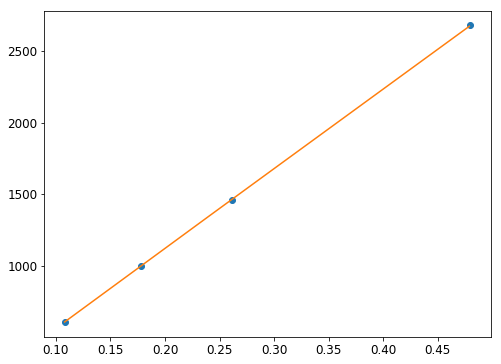

In [7]:
plot(x,y,'o')
highresx=np.arange(0.108,0.48,.001)
plot(highresx,f(highresx))

In [6]:
f=interp1d(np.genfromtxt('calibration/2WIRE',skip_header=3).T)

TypeError: __init__() missing 1 required positional argument: 'y'

In [9]:
np.genfromtxt('calibration/Sensor_ID.txt',skip_header=2,delimiter='\t',dtype=str)

array([['GRT0', '4th stage bus', 'R', 'RO-600.txt'],
       ['GRT1', '1K Cold Link', 'R', 'RX-102A.txt'],
       ['GRT2', 'open', 'R', 'RuOx2.txt'],
       ['GRT3', 'open', 'R', 'RuOx2.txt'],
       ['GRT4', '3rd stage bus', 'R', 'RO-600.txt'],
       ['GRT5', 'Nb shield (top)', 'R', 'RX-102A.txt'],
       ['GRT6', 'Det Pkg (Array)', 'R', 'RX-102A.txt'],
       ['GRT7', 'Det Pkg (Cu Back)', 'R', 'RX-102A.txt'],
       ['4-WIRE0', '1st PT head', 'V', 'DT-670_Diode2.txt'],
       ['4-WIRE1', '40-4K HSw Base', 'V', 'DT-670_Diode2.txt'],
       ['4-WIRE2', 'ADR baseplate', 'V', 'DT-670_Diode1.txt'],
       ['4-WIRE3', '2nd cold link', 'V', 'DT-670_Diode3.txt'],
       ['2-WIRE0', 'open', 'R', '400_Carbon_Resistor.txt'],
       ['2-WIRE1', 'open', 'R', '400_Carbon_Resistor.txt'],
       ['2-WIRE2', 'open', 'R', '400_Carbon_Resistor.txt'],
       ['2-WIRE3', 'ADR carbon resistor', 'R', '400_Carbon_Resistor.txt'],
       ['2-WIRE4', 'ADR diode', 'V', 'DT-670.txt'],
       ['2-WIRE5', 'grating

In [11]:
"asdfa-sdf"[0:-1].replace('-','')

'asdfasd'

In [13]:
['asdf','sdfg','dfgh','fghj'].index('dfgh')

2

In [15]:
f =lambda x: x
f("asdf")

'asdf'

In [16]:
min(1,2)

1

In [37]:
def getGRTSuffix(n):
    if n<4:
        return '0-3'
    else:
        return '4-7'

class Interpolators:
    def __init__(self):

        sensors_id = np.genfromtxt('calibration/Sensor_ID.txt',
                                   skip_header=2,
                                   delimiter='\t',
                                   dtype=str)
        self.sensors_interp = {'2WIRE':[None for x in range(8)],
                '4WIRE':[None for x in range(4)],
                'GRT0-3':[None for x in range(4)],
                'GRT4-7':[None for x in range(8)]}
        self.pre_functions = {'2WIRE':[None for x in range(8)],
                '4WIRE':[None for x in range(4)],
                'GRT0-3':[None for x in range(4)],
                'GRT4-7':[None for x in range(8)]}
        for sensor in sensors_id:
            snum=int(sensor[0][-1])
            card = sensor[0][0:-1].replace('-','')
            if card == 'GRT':
                card = card+getGRTSuffix(snum)
            card_calib = np.genfromtxt('calibration/'+card,skip_header=3).T

            card_interps = interp1d(card_calib[1],card_calib[0])
            #reversed because first col is resistance in file. I'll be putting in a voltage
            #and expecting to get out a resistance.
            if sensor[2] == 'R':
                self.pre_functions[card][snum] = card_interps

            else:
                self.pre_functions[card][snum] = preFunction = lambda x: x

            sensor_calib = np.genfromtxt('calibration/'+sensor[3],skip_header=3).T
            #print(sensor_calib)
            sensor_interp = interp1d(sensor_calib[1],sensor_calib[0])
            self.sensors_interp[card][snum]=sensor_interp


    def go(self,v,card,num):
        a = self.sensors_interp[card][num](self.pre_functions[card][num](v))
        #print(repr(a))
        return float(a)
        #interpolators apparently return 0 dimensional numpy arrays...
def printer(x):
    print(x)
    return x

In [35]:
i = Interpolators()

In [14]:
print(i.sensors_interp)

{'GRT4-7': [None, None, None, None, <function Interpolators.__init__.<locals>.<lambda> at 0x7fac857de400>, <function Interpolators.__init__.<locals>.<lambda> at 0x7fac857de9d8>, <function Interpolators.__init__.<locals>.<lambda> at 0x7fac857de488>, <function Interpolators.__init__.<locals>.<lambda> at 0x7fac857de840>], 'GRT0-3': [<function Interpolators.__init__.<locals>.<lambda> at 0x7fac85c25f28>, <function Interpolators.__init__.<locals>.<lambda> at 0x7fac857de048>, <function Interpolators.__init__.<locals>.<lambda> at 0x7fac857de7b8>, <function Interpolators.__init__.<locals>.<lambda> at 0x7fac857de6a8>], '4WIRE': [<function Interpolators.__init__.<locals>.<lambda> at 0x7fac857de950>, <function Interpolators.__init__.<locals>.<lambda> at 0x7fac857de1e0>, <function Interpolators.__init__.<locals>.<lambda> at 0x7fac857de8c8>, <function Interpolators.__init__.<locals>.<lambda> at 0x7fac857de730>], '2WIRE': [<function Interpolators.__init__.<locals>.<lambda> at 0x7fac857de378>, <functi

In [38]:
i.go(2.269,'GRT0-3',0)

0.10461612648277929

In [16]:
test = ['a','b','c','d']
test2 = [x for x in test]
test3 = [x for x in test2]
print(test3)

['a', 'b', 'c', 'd']


In [19]:
testfile=np.genfromtxt('calibration/GRT0-3',skip_header=3).T

In [20]:
testinterp=interp1d(testfile[1],testfile[0])

In [21]:
testinterp(2.3)

array(12801.25153374)